## Explorative Data Analysis

* focusing on the visual representation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [3]:
df_plot = pd.read_csv(r'C:\Users\LATITUDE\applied_data_science\data\processed\COVID_small_flat_table.csv', sep = ';')

In [4]:
df_plot.head()

,Unnamed: 0,date,Italy,US,Spain,India,Brazil
0,0,2020-01-22,0,1,0,0,0
1,1,2020-01-23,0,1,0,0,0
2,2,2020-01-24,0,2,0,0,0
3,3,2020-01-25,0,2,0,0,0
4,4,2020-01-26,0,5,0,0,0


In [5]:
country_list=['Italy','US','Spain','India','Brazil']

## Matplotlib

<Figure size 1152x648 with 0 Axes>

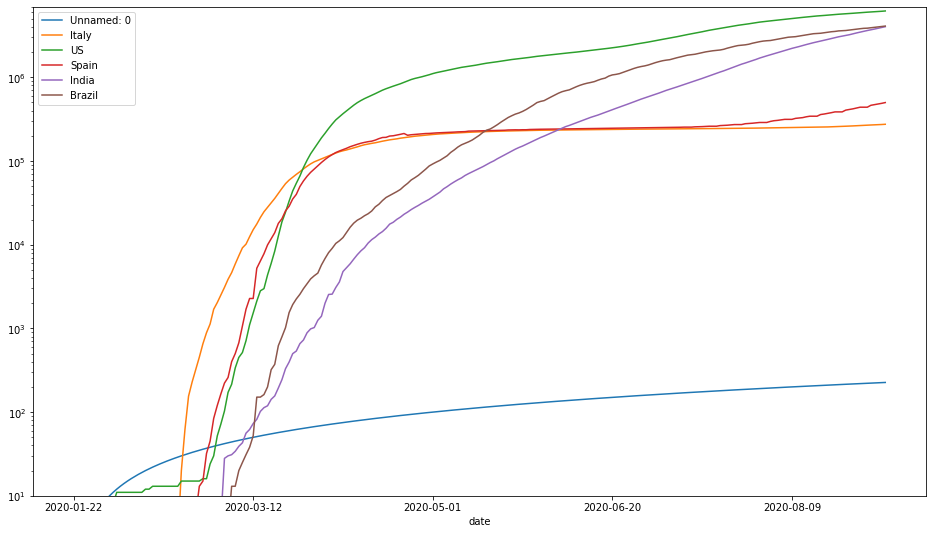

In [6]:
plt.figure();
ax=df_plot.set_index('date').plot()
plt.ylim(10, 7000000)
ax.set_yscale('log')

In [7]:
import plotly.graph_objects as go
import plotly

In [8]:
fig = go.Figure()

In [ ]:
for each in df_plot:
    fig.add_trace(go.Scatter(x=df_plot.date,
                        y=df_plot[each],
                        mode='lines',
                        name = each,
                        line_width = 1.5,
                            marker_size=2)
                        )
fig.update_layout(
                  width = 1000,
                  height = 800,
                  xaxis_title = 'Time',
                  yaxis_title = 'Confirmed infected people(source:John Hopkins)',
                  xaxis_rangeslider_visible=True
)
fig.update_yaxes(type='log',range=[1.1,7.0])

In [10]:
import dash
import dash_core_components as dcc
import dash_html_components as html
app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'India', 'value': 'India'},
            {'label': 'Brazil', 'value': 'Brazil'}
        ],
        value=['US', 'India'], #pre-selected
        multi=True
    ),
    dcc.Graph(figure=fig, id='main_window_slope')

])

In [11]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source: Johns Hopkins)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [ ]:
app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
